TODO:
+ easy table and column selection [DONE: can be better, but ok for now]


# common section

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import logging

In [2]:
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

In [3]:
# set default figsize
import matplotlib as mpl
width, height = 15, 3 # example with 15x6 inches
# mpl.rcParams['figure.figsize'] = [width, height]
sns.set(rc={'figure.figsize':(width, height)})

In [4]:
# pandas settings
pd.set_option('display.max_columns', 10000)
pd.set_option('display.precision', 8)

In [5]:
%run ./stat_help.ipynb

In [6]:
# environment information
DATAs = r'D:\Viktor\OneDrive - Microsoft\_Affirmmed\_CUBIC\FW__Cubic_Dublin_MCC_Monitoring__09_03\stat'

create dictionary of tables

In [7]:
stat = stat_frames(DATAs, "2022-04-21T10:00", "2022-04-23T10:00", tz="UTC")

not stat file pm_2022-04-22.tar
selectSortFiles time= 0:00:12.927190
put in dfs time= 0:05:23.051261


### save to pickle

In [18]:
# for k, v in stat.items():
#     v.to_pickle(k+'.pkl')

list tables

In [8]:
[k for k in stat.keys()]

['ABRRATELIMITINGVIDEOSEGMENTSTATSCHASSIS',
 'ABRRATELIMITINGVIDEOSESSIONSTATSCHASSIS',
 'APNCALLPERF',
 'APNCALLPERFSTATSGRID',
 'BEARERUSAGESTATS',
 'CONTENTCACHESUMMARYSTATS',
 'CONTENTCACHESUMMARYSTATSCHASSIS',
 'CONTENTDNSSERVERDETAILSTATSCHASSIS',
 'CONTENTDNSSERVERDETAILSTATS_KPI',
 'CONTENTDNSSERVERSUMMARYSTATSCHASSIS',
 'CONTENTDNSSERVERSUMMARYSTATSSLOT',
 'CONTENTDNSSERVERSUMMARYSTATS_KPI',
 'CONTENTFILTERCONTENTCATEGORIZATIONSTATSSLOT',
 'CONTENTFILTERCONTENTCATEGORIZATIONSTATSSLOT_KPI',
 'CONTENTFILTERSUMMARY',
 'CONTENTFILTERSUMMARYSTATSCHASSIS',
 'CONTENTHTTPCACHESTATSCHASSIS',
 'CONTENTHTTPPROXYCOMPRESSIONSTATS',
 'CONTENTHTTPPROXYCOMPRESSIONSTATSGRID',
 'CONTENTHTTPPROXYCONNECTIONSTATSCHASSIS',
 'CONTENTHTTPPROXYDETAILSTATSCHASSIS',
 'CONTENTHTTPPROXYFAILSTATSCHASSIS',
 'CONTENTHTTPPROXYLATENCYSTATSCHASSIS',
 'CONTENTHTTPPROXYOVERLOADCONTROLSTATSCHASSIS',
 'CONTENTHTTPPROXYPREMPTDNSSTATSGRID',
 'CONTENTHTTPPROXYSUMMARY',
 'CONTENTHTTPPROXYSUMMARYSTATSCHASSIS',
 'CONTENT

# Corr. to selected counter
## prepare counter

In [9]:
pgwcall = stat['PGWCALLPERFSTATSGRID']
pgwcall.head(1)

,resourceid,zone_name,pgw_name,NumCurrentSessions,NumBearers,NumCreateSessionAttempt,NumCreateSessionAccept,NumCreateSessionReject,NumCreateSessionRejectMalformedReq,NumCreateSessionRejectUnknownApn,NumCreateSessionRejectRsrcUnavailable,NumCreateSessionRejectServiceNotSupported,NumCreateSessionRejectSystemFailure,NumCreateSessionRejectMisc,NumDeleteSessionAttempt,NumDeleteSessionAccept,NumDeleteSessionReject,NumUEInitDedBearerActAttempt,NumUEInitDedBearerActAccept,NumUEInitDedBearerActReject,NumPGWInitDedBearerActAttempt,NumPGWInitDedBearerActAccept,NumPGWInitDedBearerActReject,NumMMEInitDedBearerDeactAttempt,NumMMEInitDedBearerDeactAccept,NumMMEInitDedBearerDeactReject,NumUEInitDedBearerDeactAttempt,NumUEInitDedBearerDeactAccept,NumUEInitDedBearerDeactReject,NumPGWInitDedBearerDeactAttempt,NumPGWInitDedBearerDeactAccept,NumPGWInitDedBearerDeactReject,NumModifyBearerCmdAttempt,NumModifyBearerCmdReject,NumUpdateBearerAttempt,NumUpdateBearerAccept,NumUpdateBearerReject,NumModifyBearerAttempt,NumModifyBearerAccept,NumModifyBearerReject,NumCreatePdpAttempt,NumCreatePdpAccept,NumCreatePdpReject,NumCreatePdpRejectMalformedReq,NumCreatePdpRejectUnknownApn,NumCreatePdpRejectRsrcUnavailable,NumCreatePdpRejectServiceNotSupported,NumCreatePdpRejectSystemFailure,NumCreatePdpRejectMisc,NumDeletePdpAttempt,NumDeletePdpAccept,NumDeletePdpReject,NumUEInitSecPdpActAttempt,NumUEInitSecPdpActAccept,NumUEInitSecPdpActReject,NumGGSNInitSecPdpActAttempt,NumGGSNInitSecPdpActAccept,NumGGSNInitSecPdpActReject,NumSGSNInitSecPdpDeactAttempt,NumSGSNInitSecPdpDeactAccept,NumSGSNInitSecPdpDeactReject,NumUEInitSecPdpDeactAttempt,NumUEInitSecPdpDeactAccept,NumUEInitSecPdpDeactReject,NumGGSNInitSecPdpDeactAttempt,NumGGSNInitSecPdpDeactAccept,NumGGSNInitSecPdpDeactReject,NumSGSNInitUpdatePdpAttempt,NumSGSNInitUpdatePdpAccept,NumSGSNInitUpdatePdpReject,NumGGSNInitUpdatePdpAttempt,NumGGSNInitUpdatePdpAccept,NumGGSNInitUpdatePdpReject,NumLocalCloseAttempts,NumLocalCloseAttemptsAccepted,NumIdleDurationExceededCloses,NumMaximalDurationExceededCloses,NumOperatorInitiatedCloses,NumActiveCurrentSessions,NumIdleCurrentSessions,IntervalPeakCurrentSessions,IntervalPeakActiveCurrentSessions,IntervalPeakIdleCurrentSessions,NumDefaultBearers,NumDedicatedBearers,IntervalPeakBearers,IntervalPeakDefaultBearers,IntervalPeakDedicatedBearers,NumDhcpReleaseLocalCloseAttempts,NumTraceSessionActivationAttempt,NumTraceSessionActivationAccept,NumTraceSessionDeactivationAttempt,NumTraceSessionDeactivationAccept,NumDhcpTimeoutLocalCloseAttempts,NumDhcpLeaseExpiryLocalCloseAttempts,NumRadiusDisconnectLocalCloses,NumRatTypeUtranSessions,NumRatTypeGeranSessions,NumRatTypeWlanSessions,NumRatTypeGanSessions,NumRatTypeHspaEvoSessions,NumRatTypeEUtranSessions,NumRatTypeVirtualSessions,NumGzSessions,NumUniqueSubscribers,NumColocatedSessions,NumIpv4PdnSessions,NumIpv6PdnSessions,NumIpv4v6PdnSessions,NumRatHandovers,NumSessionsSetupWithDefaultPolicy,NumActiveSessionsWithDefaultPolicy,NumActiveGxReplaySessionsAwaitingPcrfRejoin,NumGxReplaySessionsTerminated,NumDuplicateSessionLocalCloseAttempts,NumCtrlTeidLookupFailures,NumChangeNotificationReqAttempt,NumChangeNotificationReqAccept,NumChangeNotificationReqReject,NumChangeNotificationReqRejectMalformedReq,NumChangeNotificationReqRejectUnknownApn,NumChangeNotificationReqRejectRsrcUnavailable,NumChangeNotificationReqRejectServiceNotSupported,NumChangeNotificationReqRejectSystemFailure,NumChangeNotificationReqRejectMisc,NumChangeNotificationReqDrop,NumWfTeidCollisionLocalCloseAttempts,NumPcrfRejoinSuccess,NumErrorIndicationsProcessed,NumErrorIndicationLocalCloseAttempts,NumErrorIndicationBearerDeactivation,NumAwaitCoATimeoutLocalCloseAttempts,NumGtppCdrSent,NumGtppCdrRespSuccess,NumGtppCdrRespFailure,NumGtppCdrRespTimeout,NumPcrfInitiatedCloseAttempts,NumOcsInitiatedCloseAttempts,NumTotalBearersSetupSuccess,NumTotalBearersSetupFail,NumCurrentBearersQci1,NumCurrentBearersQci2,NumCurrentBearersQci3,NumCurrentBearersQci4,NumCurrentBearersQci5,NumCurrentB

In [10]:
# list available pgw_name
pgwcall.groupby(by=['pgw_name']).size()

pgw_name
PGW-DUB-Test              289
PGW-EE_01                 289
PGW-EE_Test               289
PGW-GEO-Test              289
PGW-IBASIS_2              289
PGW-IBASIS_3_TELE2        289
PGW-IBASIS_4_AIS          289
PGW-IBASIS_CUBIC-29506    289
PGW-IBASIS_CUBIC-72446    289
PGW-IBASIS_CUBIC-90173    289
PGW-OrangeF               289
PGW-OrangeF-RS            289
PGW-VF_NL                 289
dtype: int64

In [11]:
IBASIS2 = pgwcall.groupby(by=['pgw_name']).get_group('PGW-IBASIS_2')
IBASIS2.index.is_unique

True

<AxesSubplot:xlabel='#timeofcollection'>

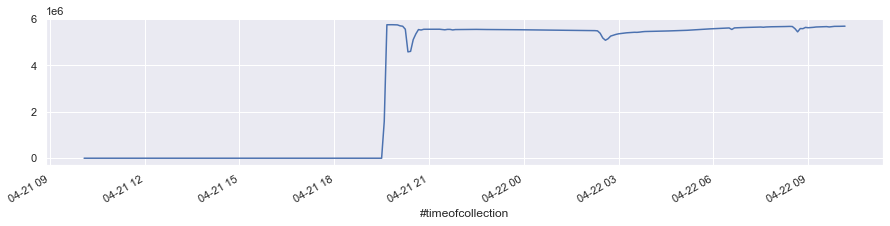

In [12]:
IBASIS2['NumCurrentSessions'].plot()

<AxesSubplot:xlabel='#timeofcollection'>

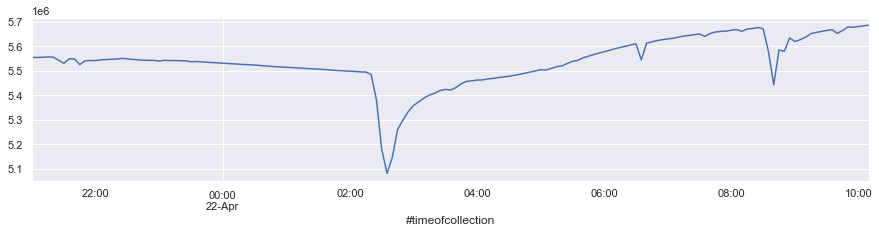

In [13]:
# taking interesting period of time
IBASIS21 = IBASIS2['NumCurrentSessions'].loc['2022-04-21 21:00':]
IBASIS21.plot()

## walk via all df and create corr df and stat_unique table
stat_unique - is a dictionary of df converted to unique datetime index and muldiindex columns

In [14]:
# taking interesting period of time for all tables
stat21 = {}
for k, v in stat.items():
    stat21[k] = v.loc['2022-04-21 21:00':]

In [15]:
corr_all, stat_unique = corrAll(stat21, IBASIS21)

(21015, 3)138, finished WORKFLOWPERFSTATSSLOTSISSIS_KPISPISISISASSISSI


## review corr df and plot interesting plots

In [16]:
# corr_all[np.abs(top_corr_all['corr']) > .99]
# top_corr_all.shape
corr_all[(corr_all['table'] == 'SYSTEMPFMSTATISTICS') & (np.abs(corr_all['corr']) > .7)]

,index,corr,table
17236,"(baserx_avg_1_min_mbps_sec, 14)",-0.72295802,SYSTEMPFMSTATISTICS
17237,"(baserx_avg_1_min_mbps_sec, 15)",-0.72209606,SYSTEMPFMSTATISTICS
17238,"(baserx_avg_1_min_mbps_sec, 16)",-0.75458224,SYSTEMPFMSTATISTICS
17239,"(baserx_avg_1_min_mbps_sec, 19)",-0.71055424,SYSTEMPFMSTATISTICS
17248,"(baserx_avg_1_min_mbps_sec, 4)",-0.72188664,SYSTEMPFMSTATISTICS
17252,"(baserx_avg_1_min_mbps_sec, 5)",-0.7208995,SYSTEMPFMSTATISTICS
17253,"(baserx_avg_1_min_mbps_sec, 6)",-0.70721017,SYSTEMPFMSTATISTICS
17256,"(baserx_avg_1_min_mbps_sec, 9)",-0.70996152,SYSTEMPFMSTATISTICS
17287,"(baserx_avg_5_min_mbps_sec, 15)",-0.71135028,SYSTEMPFMSTATISTICS
17288,"(baserx_avg_5_min_mbps_sec, 16)",-0.71523589,SYSTEMPFMSTATISTICS


C:\Users\Viktor\AppData\Local\Temp\ipykernel_27436\3547784964.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.sort_values('corr', key=np.abs, inplace=True)


1 ('baserx_avg_1_min_mbps_sec', '6') SYSTEMPFMSTATISTICS
2 ('baserx_avg_1_min_mbps_sec', '9') SYSTEMPFMSTATISTICS
3 ('baserx_avg_1_min_mbps_sec', '19') SYSTEMPFMSTATISTICS
4 ('baserx_avg_5_min_mbps_sec', '15') SYSTEMPFMSTATISTICS
5 ('baserx_avg_5_min_mbps_sec', '16') SYSTEMPFMSTATISTICS
6 ('baserx_avg_5_min_mbps_sec', '4') SYSTEMPFMSTATISTICS
7 ('baserx_avg_1_min_mbps_sec', '5') SYSTEMPFMSTATISTICS
8 ('baserx_avg_1_min_mbps_sec', '4') SYSTEMPFMSTATISTICS
9 ('baserx_avg_1_min_mbps_sec', '15') SYSTEMPFMSTATISTICS
10 ('baserx_avg_1_min_mbps_sec', '14') SYSTEMPFMSTATISTICS
11 ('baserx_avg_1_min_mbps_sec', '16') SYSTEMPFMSTATISTICS


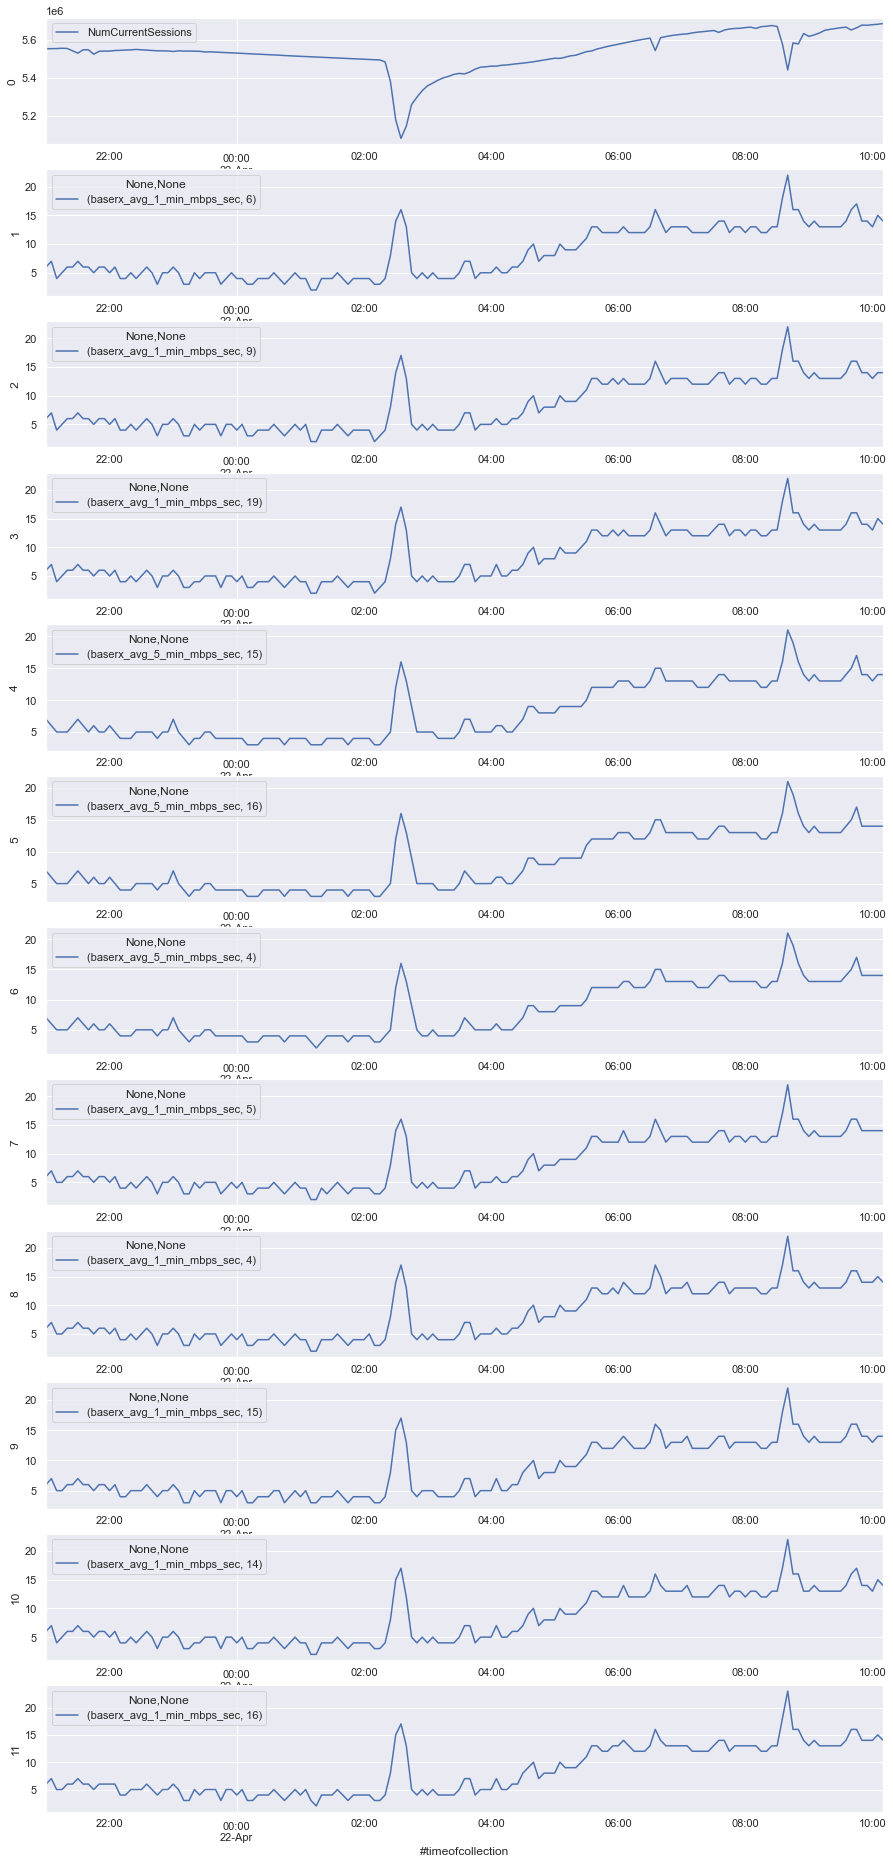

In [17]:
corr_filter = (np.abs(corr_all['corr'])>.7) & (1 >= np.abs(corr_all['corr']))
corr_filter = corr_filter & (corr_all['table'] == 'SYSTEMPFMSTATISTICS')
# dates = pd.IndexSlice[:'2022-04-22 04:00']         # optional to zoom
# axvlines=['2022-04-22 01:00', '2022-04-22 04:00']  # optional reference lines

plot_corr(corr_all, corr_filter, IBASIS21, stat_unique)